In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns 
import warnings

In [2]:
from scipy import stats
from sklearn import metrics

In [5]:
df = pd.read_excel("Imbalance_personal_loan_classification.xlsx", sheet_name= "Data")

In [6]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.shape

(5000, 14)

In [8]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

a.The variable ID does not add any particular information.

b.There are 2 nominal variables:

1.ID    
2.Zip Code

c.There are 2 Ordinal Categorical Variables:

1.Family - Family size of the customer    
2.Education - education level of the customer(1: Undergrad; 2: Graduate; 3: Advanced/Professional)

d.There are 5 independent variables:

1.Age:Age of the customer
2.Experience:Years of experience of the customer
3.Income:Annual income in dollars(($000))
4.CCAvg:Average credit card spending
5.Mortage:Value of House Mortgage




1.Personal Loan:Did this customer accept the personal loan offered in the last campaign?
2.Securities Account:Does the customer have a securities account with the bank?
3.CD Account:Does the customer have a certificate of deposit (CD) account with the bank?
4.Online:Does the customer use internet banking facilities?
5.Credit Card:Does the customer use a credit card issued by UniversalBank?

In [10]:
df.drop(["ID","ZIP Code"], axis =1, inplace = True)

In [11]:
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [12]:
df["Education"].unique()

array([1, 2, 3], dtype=int64)

In [13]:
df["CCAvg"] = df["CCAvg"]*12

In [14]:
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1


In [15]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [16]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,23.254960,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,20.971994,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,8.400000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,30.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,120.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [17]:
df[df["Experience"]<0]["Experience"].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [18]:
df["Experience"] = df.Experience.abs()

<Axes: xlabel='Mortgage'>

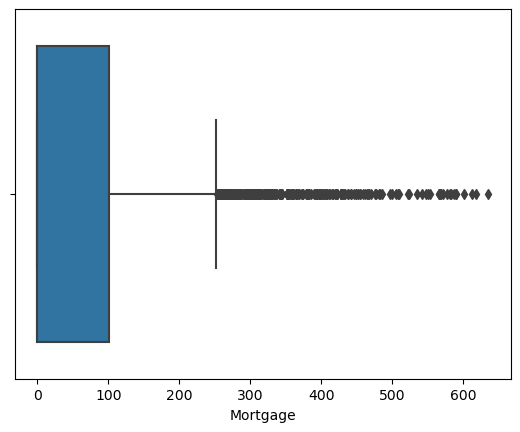

In [19]:
sns.boxplot(x = "Mortgage", data = df)

The Z-score method for outlier detection is a statistical technique used to detect outliers from data sets by calculating how many standard deviations away from the mean each data point is. A data point with a Z score of more than 3 standard deviation away from the mean is considered an outlier. We use the scipy.stats module to perform the zscore technique:

In [20]:
df[stats.zscore(df["Mortgage"])>3]['Mortgage'].count()

105

In [21]:
outlier_index = df[stats.zscore(df["CCAvg"])>3].index
len(outlier_index)

121

In [22]:
df.drop(outlier_index, axis = 0, inplace = True)
df.reset_index(drop=True, inplace=True)
df.shape

(4879, 12)

In [23]:
df["Personal Loan"].value_counts()

Personal Loan
0    4432
1     447
Name: count, dtype: int64

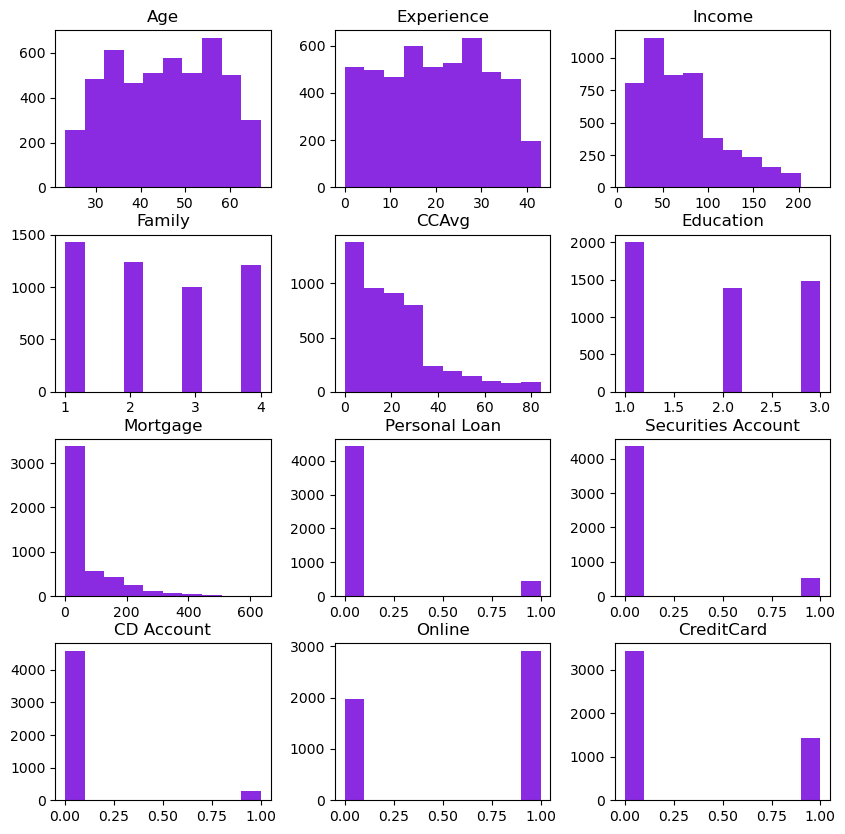

In [24]:
df.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
5.For "CCAvg" majority of the customers spend less than 2.5K 
and the average spending is between 0-10K.
6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
7.Distributin of "Family" and "Education" are evenly distributed

<Axes: xlabel='Education', ylabel='Income'>

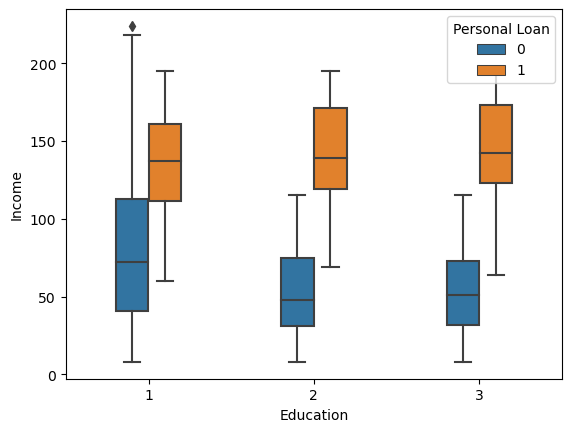

In [25]:
sns.boxplot(data=df, x="Education", y="Income", hue="Personal Loan", width = 0.4)

<Axes: xlabel='Education', ylabel='Mortgage'>

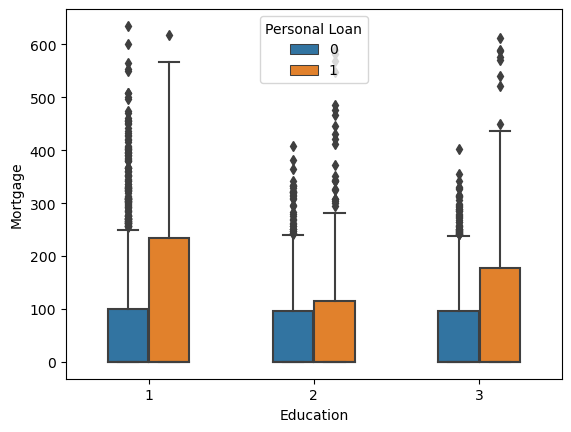

In [26]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df, width = 0.5)

<Axes: xlabel='Family', ylabel='count'>

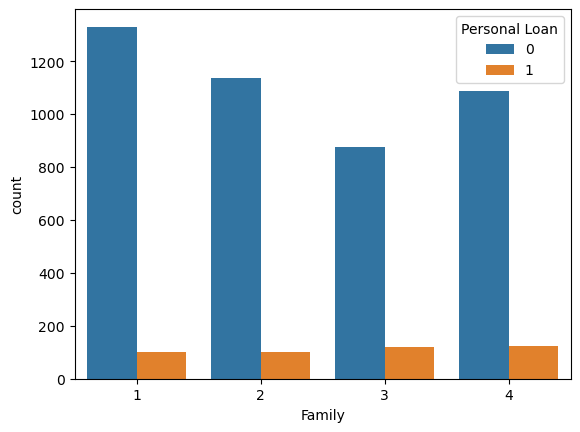

In [27]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

<Axes: xlabel='Online', ylabel='count'>

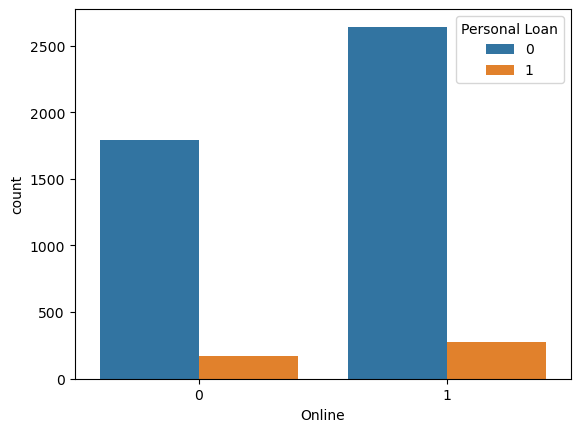

In [28]:
sns.countplot(x='Online',data=df,hue='Personal Loan')

<Axes: xlabel='CD Account', ylabel='count'>

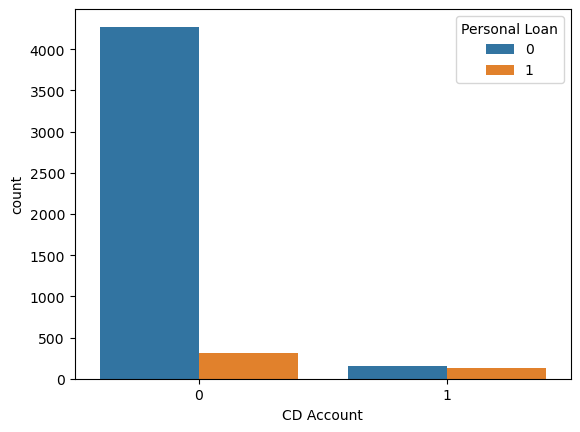

In [29]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

In [30]:
df[df["CD Account"]==1]["Personal Loan"].value_counts()

Personal Loan
0    158
1    131
Name: count, dtype: int64

In [31]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'] 

<Axes: xlabel='Personal Loan', ylabel='count'>

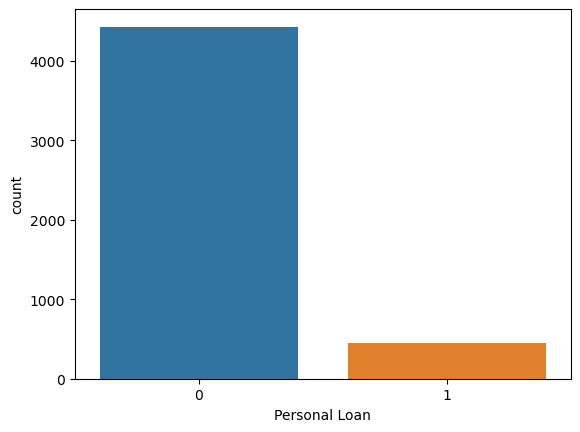

In [32]:
sns.countplot(x = "Personal Loan", data = df)

In [33]:
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1


In [34]:
type(df["Age"][0])

numpy.int64

In [35]:
column_feature = ["Age","Experience","Income","Family","CCAvg","Education","Mortgage"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[column_feature] = scaler.fit_transform(df[column_feature])

In [36]:
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,1.000000,0.228571,0.0,0.0,0,1,0,0,0
1,0.500000,0.441860,0.120370,0.666667,0.214286,0.0,0.0,0,1,0,0,0
2,0.363636,0.348837,0.013889,0.000000,0.142857,0.0,0.0,0,0,0,0,0
3,0.272727,0.209302,0.425926,0.000000,0.385714,0.5,0.0,0,0,0,0,0
4,0.272727,0.186047,0.171296,1.000000,0.142857,0.5,0.0,0,0,0,0,1


In [37]:
class_1 = df[df["Personal Loan"]==1]
class_0 = df[df["Personal Loan"]==0]

In [38]:
class_0.shape

(4432, 12)

In [39]:
class_1.shape

(447, 12)

In [40]:
class_balance = class_1.sample(4432, replace = True)

In [41]:
df_1 = pd.concat([class_0,class_balance], axis = 0)

In [42]:
df_1.head(6)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,1.000000,0.228571,0.0,0.000000,0,1,0,0,0
1,0.500000,0.441860,0.120370,0.666667,0.214286,0.0,0.000000,0,1,0,0,0
2,0.363636,0.348837,0.013889,0.000000,0.142857,0.0,0.000000,0,0,0,0,0
3,0.272727,0.209302,0.425926,0.000000,0.385714,0.5,0.000000,0,0,0,0,0
4,0.272727,0.186047,0.171296,1.000000,0.142857,0.5,0.000000,0,0,0,0,1
5,0.318182,0.302326,0.097222,1.000000,0.057143,0.5,0.244094,0,0,0,1,0


In [43]:
df_1.shape

(8864, 12)

In [65]:
X = df.drop("Personal Loan", axis = 1)
y = df["Personal Loan"]

In [66]:
X.shape

(4879, 11)

In [67]:
y.shape

(4879,)

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [70]:
y_train.value_counts()

Personal Loan
0    3545
1     358
Name: count, dtype: int64

In [71]:
y_test.value_counts()

Personal Loan
0    887
1     89
Name: count, dtype: int64

In [72]:
from sklearn.metrics import classification_report

In [73]:
from sklearn.linear_model import LogisticRegression
LR  = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       887
           1       0.92      0.51      0.65        89

    accuracy                           0.95       976
   macro avg       0.94      0.75      0.81       976
weighted avg       0.95      0.95      0.94       976



In [74]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       887
           1       0.95      0.65      0.77        89

    accuracy                           0.97       976
   macro avg       0.96      0.82      0.88       976
weighted avg       0.96      0.97      0.96       976



In [91]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       887
           1       0.94      0.92      0.93        89

    accuracy                           0.99       976
   macro avg       0.97      0.96      0.96       976
weighted avg       0.99      0.99      0.99       976



In [90]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_depth=200, n_estimators=30,
    min_samples_split=2, max_leaf_nodes=30,
    random_state=22)
rc.fit(X_train, y_train)
y_predict = rc.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.99      0.89      0.93        89

    accuracy                           0.99       976
   macro avg       0.99      0.94      0.96       976
weighted avg       0.99      0.99      0.99       976



In [77]:
from sklearn import metrics
print('Training Accuracy : ',
      metrics.accuracy_score(
          y_train, rc.predict(X_train))*100)
 
print('Validation Accuracy : ', metrics.accuracy_score(
    y_test, rc.predict(X_test))*100)

Training Accuracy :  94.00461183704843
Validation Accuracy :  93.23770491803278


In [78]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X_train, y_train)
y_predict = ad.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       887
           1       0.90      0.78      0.83        89

    accuracy                           0.97       976
   macro avg       0.94      0.88      0.91       976
weighted avg       0.97      0.97      0.97       976



In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,random_state=100,max_features=5)
gd.fit(X_train, y_train)
y_predict = gd.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.97      0.93      0.95        89

    accuracy                           0.99       976
   macro avg       0.98      0.96      0.97       976
weighted avg       0.99      0.99      0.99       976

